# Lineare Regression

### DaLI &ndash; KI-Campus
#### Prof. Dr. Richard Hirsch, 17.03.2022

## Funktionsgleichung

In [1]:
from matplotlib import pyplot as plt
from matplotlib import cm

%matplotlib notebook

In [2]:
run = 0

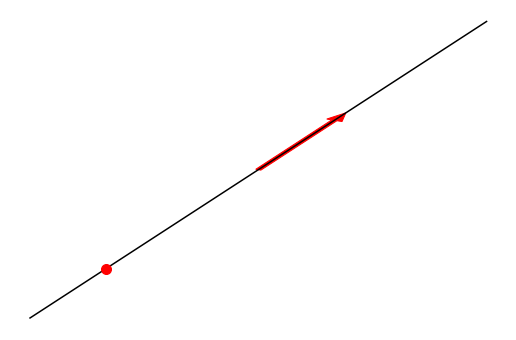

In [3]:
α0 = 0     # Achsenabschnitt
α1 = 2     # Steigung

fig, ax = plt.subplots(figsize = (9, 6))

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_axis_off()

# Funktionsgraph (Steigung: 2)
ax.plot((-2, 10), (α0 - 2*α1, α0 + 10*α1), color = 'black')

# Punkt
ax.plot(0, α0, color = 'red', marker = 'o', markersize = 10)

# Steigung
ax.arrow(4, α0 + 4*α1, 2, 2*α1, color = 'red', width = 0.15)

# kartesisches Koordinatensystem
if run > 0:
    ax.set_axis_on()
    # Steigungsdreieck
    ax.arrow(4, α0 + 4*α1, 2, 0, color = 'gray')
    ax.arrow(6, α0 + 4*α1, 0, 2*α1, color = 'gray')
    ax.text(5, α0 + 4*α1, r'$\Delta x$', verticalalignment = 'top', horizontalalignment = 'center', fontsize = 14)
    ax.text(6, α0 + 5*α1, r'$\Delta y = \alpha_1\cdot\Delta x$', verticalalignment = 'center', fontsize = 14)

run += 1

### zur Erinnerung

- Eine Gerade ist durch ihre *Steigung* und *einen Punkt* eindeutig bestimmt.
- In einem kartesischen Koordinatensystem kann die Gerade als Graph eines Polynoms 1.&nbsp;Grades beschrieben werden: $$y = \alpha_0 + \alpha_1 x$$
- $\alpha_0$ ist der Funktionswert am Punkt $x = 0$ (*$y$-Achsenabschnitt*).
- $\alpha_1$ ist die Steigung.

### Messdaten

Daten aus Messungen sind fehlerbehaftet; die Datenpunkte liegen nicht genau auf einer Geraden.

$$
  y_i = \alpha_0 + \alpha_1 x_i + \epsilon_i,\qquad\text{für $i\in\{1, \ldots, n\}$}
$$

Die Fehler sind (in der Regel) normalverteilt: 
$$
  \epsilon_i \sim \mathcal{N}(0, \sigma_\epsilon)
$$

### Modelldaten

Wir leisten uns den Luxus, bei der Bestimmung von Schätzwerten für $\alpha_0$ und $\alpha_1$ &mdash; wir nennen sie  $\beta_0$ und $\beta_1$ &mdash; mit Modelldaten zu arbeiten, die wir selbst durch eine *Simulation* aus einem Paar vorgegebener Parameter $\alpha_0$ und $\alpha_1$ erzeugen. Wir kennen also das richtige Ergebnis schon vorher, und können unsere Verfahren entsprechend bewerten.

Dazu berechnen wir zu einem vorgegebenen Satz von $x$-Werten die entsprechenden $y$-Werte und beaufschlagen sie mit einem kleinen Fehler&nbsp;$\epsilon$. Dieses $\epsilon$ ist *normalverteilt* mit einem Mittelwert von&nbsp;0 und einer Standdardabweichung von $\sigma_\epsilon$.
$$
  y_i = \alpha_0 + \alpha_1 x_i + \epsilon,\qquad\text{für $i\in\{1, \ldots, n\}$}
$$

(Zur Simulation der Fehler können wir die Funktion `default_rng` aus der `numpy`-Bibliothek verwenden. Sie liefert einen Generator, der Zahlenfolgen liefert, die sich wie Zufallszahlen verhalten. Im Gegensatz zu echten Zufallszahlen können Sie aber mit Hilfe des Parameters `seed` reproduziert werden.)

In [4]:
import numpy as np

rng = np.random.default_rng(seed = 1313)

In [5]:
α0, α1 = (1, 0.5)           # die "echten" Werte für Achsenabschnitt und Steigung
𝜎_ε = 0.2                   # Standardabweichung der Fehler
n = 10                      # Anzahl der simulierten Datenpunkte

x = np.sort(10*rng.random(size = n))
y = α0 + α1*x + rng.normal(scale = 𝜎_ε, size = n)

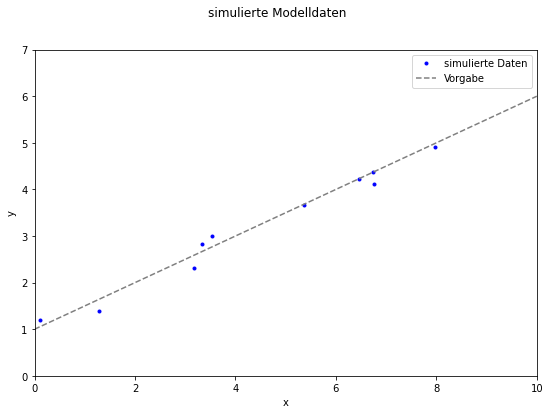

In [6]:
fig2, ax2 = plt.subplots(figsize = (9, 6))

fig2.suptitle("simulierte Modelldaten")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_xlim((0, 10))
ax2.set_ylim((0, 7))

ax2.plot(x, y, marker = ".", color = "blue", linestyle = "", label= "simulierte Daten")
ax2.plot((0, 10), (α0, α0 + 10*α1), color = "gray", linestyle = "dashed", label = "Vorgabe")
ax2.legend()
None

#### Qualitätsfunktion

In [7]:
def sum_squared_distances(β0, β1):
    distances = β0 + β1*x - y
    return np.sum(distances**2)

In [8]:
# analytische Lösung (nur für die Abbildung; kommt später)
def lin_reg(x, y):
    """linear regression on x and y, returns intercept and slope"""
    S1  = len(x)
    Sx  = np.sum(x)
    Sy  = np.sum(y)
    Sxx = np.sum(x**2)
    Sxy = np.sum(x*y)
    
    slope = (S1*Sxy - Sx*Sy)/(S1*Sxx - Sx*Sx)
    intercept = (Sy - slope*Sx)/S1
    
    return intercept, slope

β0_opt, β1_opt = lin_reg(x, y) 

In [9]:
run = 0

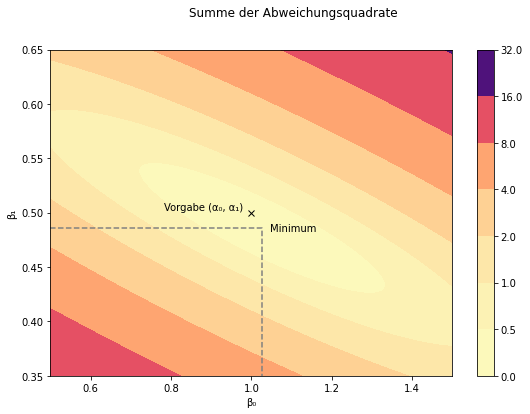

In [12]:
X, Y = np.meshgrid(np.linspace(α0 - 0.5, α0 + 0.5, 100), np.linspace(α1 - 0.15, α1 + 0.15, 100))

Z = np.array([ sum_squared_distances(β0, β1) for β0, β1 in zip(X.flatten(), Y.flatten())])
Z.shape=(len(X), len(Y))

fig_ssd, ax_ssd = plt.subplots(figsize=(9, 6))
fig_ssd.suptitle("Summe der Abweichungsquadrate")

ax_ssd.set_xlabel('β₀')
ax_ssd.set_ylabel('β₁')

# Konturen
cs = ax_ssd.contourf(X, Y, Z, levels = [0, 0.5, 1, 2, 4, 8, 16, 32], cmap = cm.magma_r)
cbar = fig_ssd.colorbar(cs)

# Minimum (Ergebnis aus der linearen Regression)
if run > 0:
    ax_ssd.plot((α0 - 0.5, β0_opt, β0_opt), (β1_opt, β1_opt, α1 - 0.15), color = 'gray', linestyle = 'dashed')
    ax_ssd.text(β0_opt + 0.02, β1_opt, "Minimum", verticalalignment = 'center')

# vorgegebene Werte
if run > 1:
    ax_ssd.plot(α0, α1, "xk")
    ax_ssd.text(α0 - 0.02, α1, "Vorgabe (α₀, α₁)", horizontalalignment = 'right', verticalalignment = 'bottom')
            
run += 1

Die begrenzte Information aus den Messwerten lässt es nicht zu, die realen (vorgegebenen) Parameter $a_1$ und $a_0$ der Grundgesamtheit zu ermitteln! 

Wir erhalten lediglich *Schätzwerte*.

## Iterative Lösung

Zunächst wollen wir versuchen, die optimalen Werte für $\beta_0$ und $\beta_1$ ohne höhere Mathematik zu bestimmen. Dazu probieren wir, ob der folgende *Algorithmus* zum Erfolg führt:

### Algorithmus zur iterativen Bestimmung der Geradenparameter

1. lege Startwerte für die gesuchten Parameter fest (z. B. Achsenabschnitt und Steigung der Geraden durch den ersten und letzten Datenpunkt).
2. berechne den Wert der Qualitätsfunktion für die gewählten $\beta_0$ und $\beta_1$.
3. verändere den Wert von $\beta_0$ um einen kleinen, zufälligen Betrag;
4. berechne die Qualitätsfunktion für die neuen Wert von $\beta_0$ (und dem alten $\beta_1$).
5. Wenn der neue Wert der Qualitätsfunktion kleiner (also besser) ist als der alte, behalte das neue $\beta_0$ bei, falls nicht, verwerfe es.
6. verändere die Werte von $\beta_1$ um einen kleinen, zufälligen Betrag;
7. berechne die Qualitätsfunktion für den neuen Wert von $\beta_1$.
8. Wenn der neue Wert der Qualitätsfunktion kleiner (also besser) ist als der alte, behalte das neue $\beta_1$ bei, falls nicht, verwerfe es.
9. wiederhole die Schritte 3 bis 8 solange, bis ein Abbruchskriterium erfüllt ist.

Wir brechen die Iteration ab, wenn sich der Wert von $Q(\beta_0, \beta_1)$ über 20 Wiederholungen nicht verbessert.

### Festlegen der Startwerte

In [13]:
𝛽1 = (y[-1] - y[0])/(x[-1] - x[0])
𝛽0 = y[0] - 𝛽1*x[0]

In [14]:
ssd = sum_squared_distances(β0, β1)

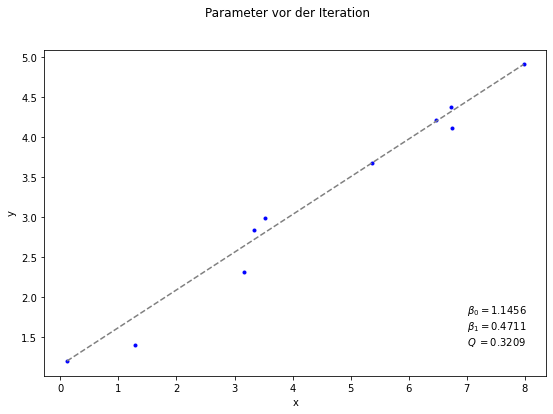

In [15]:
fig_i0, ax_i0 = plt.subplots(figsize = (9, 6))
fig_i0.suptitle("Parameter vor der Iteration")

ax_i0.set_xlabel("x")
ax_i0.set_ylabel("y")
# ax_i0.set_xlim((0, 10))
# ax_i0.set_ylim((0, 7))

ax_i0.plot(x, y, marker = ".", linestyle = "", color = "blue", )
ax_i0.plot(x, 𝛽0 + x*𝛽1, color = "gray", linestyle = "dashed")

ax_i0.text(7, 1.8, rf"$\beta_0 = {𝛽0:9.4f}$")
ax_i0.text(7, 1.6, rf"$\beta_1 = {𝛽1:9.4f}$")
ax_i0.text(7, 1.4, rf"$Q\; = {ssd:9.4f}$")
None

### Iteration

In [16]:
σ_rel = 0.01
max_no_changes = 20 # if there is no change in 20 iterations we are going to stop

results = [(0, β0, β1, ssd)]
counter = 0
no_changes = 0

while no_changes < max_no_changes:
    counter += 1
    no_changes += 1
    
    # try to improve β0
    β0_test = rng.normal(β0, β0*σ_rel)
    ssd_test  = sum_squared_distances(β0_test, β1)
    if ssd_test < ssd: # success: conserve achievment
        β0 = β0_test
        ssd = ssd_test
        no_changes = 0
        
    # try to improve β1
    β1_test = rng.normal(β1, β0*σ_rel)
    ssd_test  = sum_squared_distances(β0, β1_test)
    if ssd_test < ssd: # success: conserve achievment
        β1 = β1_test
        ssd = ssd_test
        no_changes = 0
        
    if no_changes == 0:  # if there was an improvement
        results.append( (counter, β0, β1, ssd) )

Die Ergebnisse speichern wir in einen [Pandas](https://www.pandas.org) *Dataframe*.

In [17]:
import pandas as pd

results_df = pd.DataFrame(results, columns=['iteration', 'β0', 'β1', 'ssd'])
results_df

,iteration,β0,β1,ssd
0,0,1.145602,0.471117,0.320934
1,1,1.134107,0.471117,0.310304
2,3,1.121834,0.471117,0.301873
3,4,1.110350,0.471117,0.296712
4,7,1.102466,0.471117,0.294695
5,9,1.088832,0.471117,0.294142
6,11,1.096682,0.471117,0.294007
7,14,1.091228,0.471117,0.293970
8,15,1.091228,0.473259,0.290841
9,17,1.091228,0.476679,0.290806


(0.0, 0.32295062762587756)

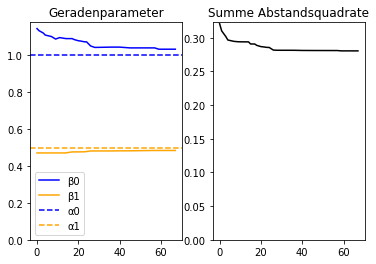

In [18]:
fig_i, (ax_ib, ax_iq) = plt.subplots(ncols = 2)

ax_ib.set_title('Geradenparameter')
ax_ib.plot(results_df.iteration, results_df.β0, color = 'blue', label = 'β0')
ax_ib.plot(results_df.iteration, results_df.β1, color = 'orange', label = 'β1')
ax_ib.axhline(α0, color = 'blue',   linestyle = 'dashed', label = 'α0')
ax_ib.axhline(α1, color = 'orange', linestyle = 'dashed', label = 'α1')
ax_ib.set_ylim(bottom = 0)
ax_ib.legend()

ax_iq.set_title('Summe Abstandsquadrate')
ax_iq.plot(results_df.iteration, results_df.ssd, color = 'black')
ax_iq.set_ylim(bottom = 0)

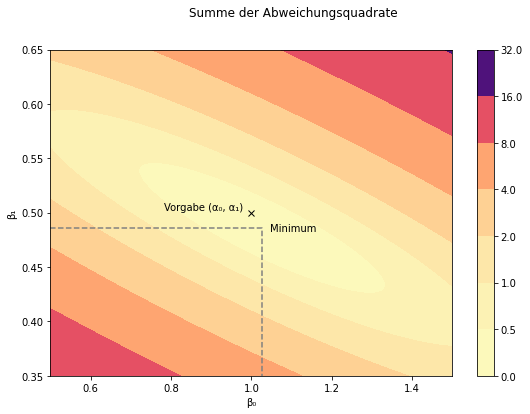

In [19]:
fig_ssd

In [22]:
b0 = results_df['β0']
b1 = results_df['β1']

ax_ssd.plot(b0, b1, color = "black")
None

In [23]:
results_df.iloc[-1]

iteration    67.000000
β0            1.033734
β1            0.484485
ssd           0.280594
Name: 23, dtype: float64

### Residuen

Die Abweichungen zwischen der Modellfunktion mit den gefitteten Parametern und den Datenpunkten werden *Residuen* genannt.

Sie sollten zufällig um die Nulllinie verteilt sein. Systematische Abweichungen würden darauf hindeuten, dass das Modell nicht mächtig genug ist, die Daten zu beschreiben.

In [24]:
residuals = β0 + β1*x - y

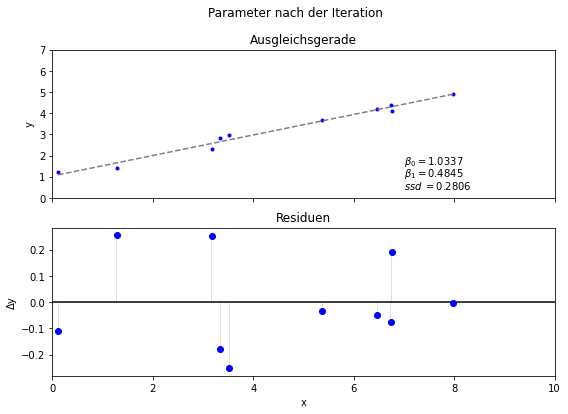

In [25]:
fig_r, (ax_rl, ax_rr) = plt.subplots(nrows = 2, sharex = True, figsize = (9, 6))
fig_r.suptitle("Parameter nach der Iteration")

ax_rl.set_title("Ausgleichsgerade")
ax_rl.set_ylabel("y")
ax_rl.set_xlim((0, 10))
ax_rl.set_ylim((0, 7))

ax_rl.plot(x, y, ".b")
ax_rl.plot(x, 𝛽0 + x*𝛽1, color = "gray", linestyle = "dashed")

ax_rl.text(7, 1.6, rf"$\beta_0 = {𝛽0:9.4f}$")
ax_rl.text(7, 1.0, rf"$\beta_1 = {𝛽1:9.4f}$")
ax_rl.text(7, 0.4, rf"$ssd\; = {ssd:9.4f}$")
       
ax_rr.set_title("Residuen")
ax_rr.set_xlabel("x")
ax_rr.set_ylabel("Δy")
ax_rr.set_xlim((0, 10))
ax_rr.axhline(0, color="black")

for x_, r in zip(x, residuals):
    ax_rr.arrow(x_, 0, 0, r, color = 'gray', linewidth = 0.1)
ax_rr.plot(x, residuals, marker = "o", linestyle = "", color = "blue")
None

## analytische Lösung

Bei linearen Modellen kann man die optimalen Schätzwerte für 𝛽0
und 𝛽1 auch direkt aus den Daten berechnen.

### Qualitätsfunktion

#### Schnitt in Richtung β₀

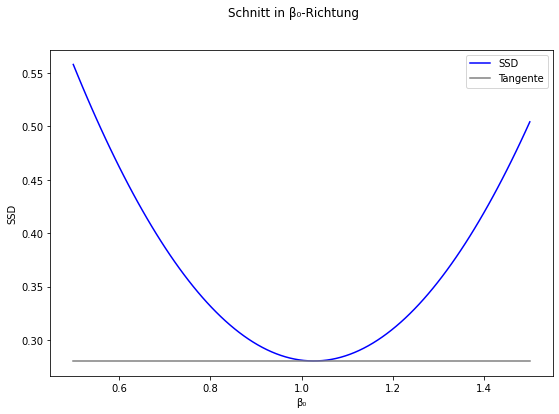

In [26]:
ssd_opt = sum_squared_distances(β0_opt, β1_opt)

fig_q_b0, ax_q_b0 = plt.subplots(figsize = (9, 6))
fig_q_b0.suptitle("Schnitt in β₀-Richtung")

x_b0 = np.linspace(0.5, 1.5, 100)
y_b0 = (x_b0 - β0_opt)**2 + ssd_opt
t_b0  = np.full_like(x_b0, ssd_opt)

ax_q_b0.set_xlabel('β₀')
ax_q_b0.set_ylabel('SSD')
# ax_q_b0.set_yticks([])
# ax_q_b0.set_ylim(0, 0.6)

ax_q_b0.plot(x_b0, y_b0, color = 'blue', label = 'SSD')
ax_q_b0.plot(x_b0, t_b0, color = 'gray', label = 'Tangente')

plt.legend()
None

- Am Minimum beträgt die Steigung der Tangente am Rand der Schnittfläche null.
- Am Minimum ist der Funktionswert der **1. Ableitung der Qualitätsfunktion nach β₀** gleich null.

#### Schnitt in Richtung β₁

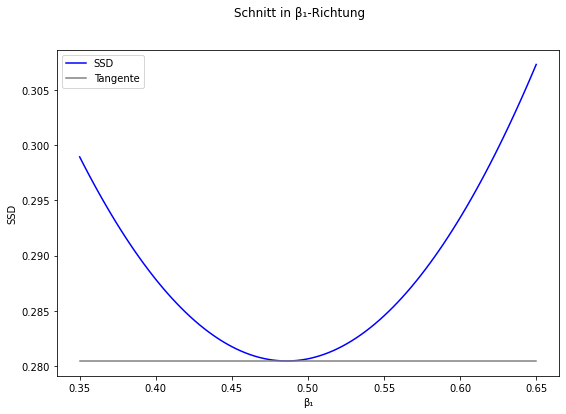

In [27]:
fig_q_b1, ax_q_b1 = plt.subplots(figsize = (9, 6))
fig_q_b1.suptitle("Schnitt in β₁-Richtung")

x_b1 = np.linspace(0.35, 0.65, 100)
y_b1 = (x_b1 - β1_opt)**2 + ssd_opt
t_b1  = np.full_like(x_b1, ssd_opt)

ax_q_b1.set_xlabel('β₁')
ax_q_b1.set_ylabel('SSD')
# ax_q_b1.set_yticks([])
# ax_q_b1.set_ylim(0, 0.4)

ax_q_b1.plot(x_b1, y_b1, color = 'blue', label = 'SSD')
ax_q_b1.plot(x_b1, t_b1, color = 'gray', label = 'Tangente')

plt.legend()
None

- Am Minimum beträgt die Steigung der Tangente am Rand der Schnittfläche null.
- Am Minimum ist der Funktionswert der **1. Ableitung der Qualitätsfunktion nach β₁** gleich null.

### Berechnung der optimalen Schätzwerte β₀ und β₁

Für die Berechnung der optimalen Werte für $\beta_0$ und $\beta_1$ bildet man die (partiellen) Ableitungen von 
$$
  Q(\beta_0,\beta_1) = \sum_{i=1}^n (\beta_0 + \beta_1 x_i - y_i)^2
$$
nach $\beta_0$ bzw. $\beta_1$ und bestimmt die jeweiligen Nullstellen:
$$
\begin{align*}
  Q_{\beta_0} &= \sum_{i=1}^n\; \hphantom{x_i\cdot{}}2\cdot(\beta_0 + \beta_1 x_i - y_i) = 0 \\
  Q_{\beta_1} &= \sum_{i=1}^n\; x_i\cdot 2\cdot (\beta_0 - \beta_1 x_i - y_i) = 0 \\
\end{align*}
$$

Wir erhalten zwei Gleichungen (mit den zwei Unbekannten $\beta_0$ und $\beta_1$):

$$
\begin{align*}
  S_{y}  &= \beta_0 S_1 + \beta_1 S_{x} \\[2ex]
  S_{xy} &= \beta_0 S_{x} + \beta_1 S_{xx}\\
\end{align*}
$$

mit 
$$
\begin{align*}
  S_1   &= n, \\
  S_{x} &= \sum_{i=1}^n x_i, &
  S_{y} &= \sum_{i=1}^n y_i, \\
  S_{xx} &= \sum_{i=1}^n x_i^2, &
  S_{xy} &= \sum_{i=1}^n x_i y_i
\end{align*}
$$

&hellip; und können sie nach $\beta_0$ und $\beta_1$ auflösen:

$$
\begin{align*}
  \beta_1 &= \frac{S_1 S_{xy} - S_x S_y}{S_1 S_{xx} - S_x S_x} \\[2ex]
  \beta_0 &= \frac{S_y - \beta_1 S_x}{n}% = \bar{y} - \beta_1 \bar{x}
\end{align*}
$$

In [28]:
S1  = len(x)
Sx  = np.sum(x)
Sy  = np.sum(y)
Sxx = np.sum(x**2)
Sxy = np.sum(x*y)

β1_analytisch = (S1*Sxy - Sx*Sy)/(S1*Sxx - Sx*Sx)
β0_analytisch = (Sy - β1_analytisch*Sx)/S1
ssd_analytisch = sum_squared_distances(β0_analytisch, β1_analytisch)

print(f"analytische Lösung für β0:     {β0_analytisch:8.4f}")
print(f"analytische Lösung für β1:     {β1_analytisch:8.4f}")
print(f"Summe der Abweichungsquadrate: {ssd_analytisch:8.4f}")

analytische Lösung für β0:       1.0269
analytische Lösung für β1:       0.4860
Summe der Abweichungsquadrate:   0.2804


Vergleich mit den Daten aus der Iteration:

In [29]:
print(f"Schätzwert für β0:             {β0:8.4f}")
print(f"Schätzwert für β1:             {β1:8.4f}")
print(f"Summe der Abweichungsquadrate: {ssd:8.4f}")

Schätzwert für β0:               1.0337
Schätzwert für β1:               0.4845
Summe der Abweichungsquadrate:   0.2806


In [30]:
run = 0

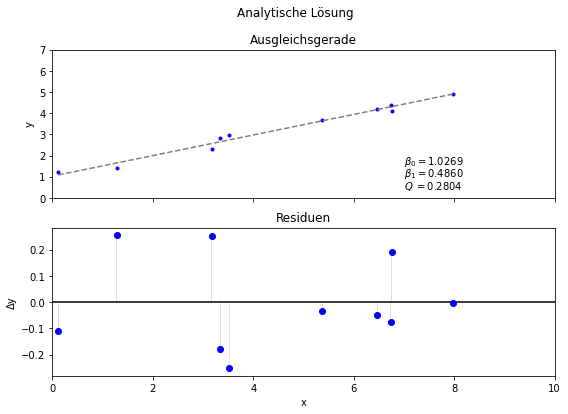

In [31]:
fig_opt, (ax_optl, ax_optr) = plt.subplots(nrows = 2, sharex = True, figsize = (9, 6))
fig_opt.suptitle("Analytische Lösung")

ax_optl.set_title("Ausgleichsgerade")
ax_optl.set_ylabel("y")
ax_optl.set_xlim((0, 10))
ax_optl.set_ylim((0, 7))

ax_optl.plot(x, y, marker = ".", color = "blue", linestyle = "")
ax_optl.plot(x, 𝛽0_analytisch + x*𝛽1_analytisch, color = "gray", linestyle = "dashed")

ax_optl.text(7, 1.6, rf"$\beta_0 = {𝛽0_analytisch:9.4f}$")
ax_optl.text(7, 1.0, rf"$\beta_1 = {𝛽1_analytisch:9.4f}$")
ax_optl.text(7, 0.4, rf"$Q\; = {ssd_analytisch:9.4f}$")
       
ax_optr.set_title("Residuen")
ax_optr.set_xlabel("x")
ax_optr.set_ylabel("Δy")
ax_optr.set_xlim((0, 10))
ax_optr.axhline(0, color = "black")

for x_, r in zip(x, residuals):
    ax_optr.arrow(x_, 0, 0, r, color = "gray", linewidth = 0.1)
ax_optr.plot(x, residuals, marker = "o", color = "blue", linestyle = "")

if run > 0:
    ax_optl.plot(Sx/S1, Sy/S1, marker = "o", color = "red")
    ax_optl.text(Sx/S1, Sy/S1 - 0.8, r'$(\bar{x}, \bar{y})$', horizontalalignment = 'center')

run += 1

###  Vorteile der analytischen Lösung

- liefert immer die optimalen Parameter
- sehr schnell zu berechnen
- gewährt neue Einsichten

#### Schlussfolgerung aus der analytischen Lösung

\begin{align*}
   \beta_0 &= \frac{S_y - \beta_1 S_x}{n} \\
           &= \frac{1}{n}\,S_y - \beta_1\cdot\frac{1}{n} S_x \\[2ex]
           &= \bar{y} - \beta_1 \cdot \bar{x}\\[2ex]
   \text{oder}\hspace{2em}\\[2ex]
   \bar{y} &= \beta_0 + \beta_1 \cdot \bar{x}
\end{align*}

Die Ausgleichsgerade geht also immer durch den Schwerpunkt der Datenpunkte.

## Ergänzungen

### Residuenbetrachtung bei insuffizientem Modell (*Underfitting*)

#### Modelldaten

Die Daten stammen tatsächlich von einem Polynom 3. Grades.

In [32]:
i3 = (-1, 1)              # interval to draw samples from
a3, c3 = -0.1, 1.1        # parameters of polynomial
x3 = (i3[1] - i3[0])*rng.random(20) + i3[0]  # from interval i3
y3 = a3*x3**3 + c3*x3 + rng.normal(0, 0.001, size = len(x3))

β0_3, β1_3 = lin_reg(x3, y3)

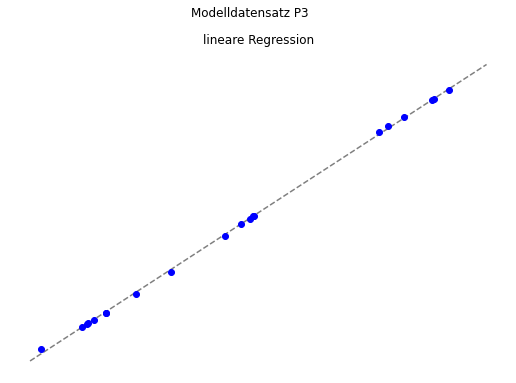

In [33]:
fig_m3, ax_m3 = plt.subplots(figsize = (9, 6))
fig_m3.suptitle("Modelldatensatz P3")

ax_m3.set_title("lineare Regression")
ax_m3.set_xlabel("x")
ax_m3.set_ylabel("y")
ax_m3.set_axis_off()
ax_m3.plot(i3, β0_3 + β1_3*np.array(i3), color = "gray", linestyle = "dashed")
ax_m3.plot(x3, y3, marker = "o", color = "blue", linestyle = "")
None

#### Residuen

In [34]:
residuals_3 = y3 - β0_3 - β1_3*x3

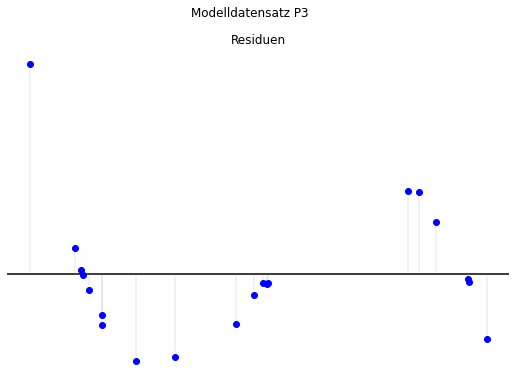

In [35]:
fig_r3, ax_r3 = plt.subplots(figsize = (9, 6))
fig_r3.suptitle("Modelldatensatz P3")

ax_r3.set_title("Residuen")
ax_r3.set_xlabel("x")
ax_r3.set_ylabel("Δy")
ax_r3.set_axis_off()
ax_r3.axhline(0, color = "black")

for x_, r_ in zip(x3, residuals_3):
    ax_r3.plot((x_, x_), (0, r_), color = "gray", linewidth = 0.2)
ax_r3.plot(x3, residuals_3, marker = "o", color = "blue", linestyle = "")
None

Die Residuen schwanken nicht zufällig um die Nulllinie; es liegen systematische Abweichungen vor. Hier wäre ein komplexeres Modell angebracht: kubische, statt lineare Regression, d. h. Anpassung an ein Polynom 3. Grades.

Möglicherweise kann man im Interpolationsintervall mit den Abweichungen leben, aber auf keinen Fall darf man **extrapolieren**.

#### Extrapolation

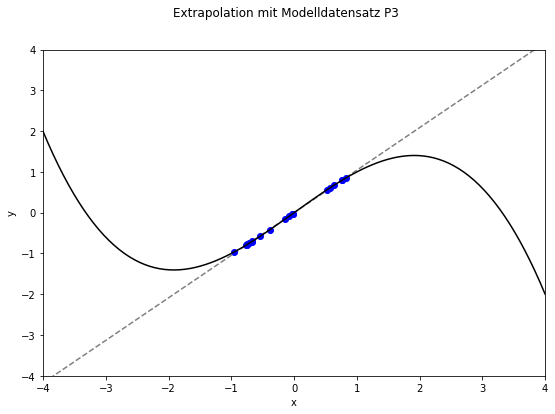

In [36]:
from matplotlib import animation as animation

fig_e3, ax_e3 = plt.subplots(figsize = (9, 6))
fig_e3.suptitle("Extrapolation mit Modelldatensatz P3")

def animate(lim):
    ax_e3.clear()

    ax_e3.set_xlabel("x")
    ax_e3.set_ylabel("y")
    ax_e3.set_xlim((-lim, lim))
    ax_e3.set_ylim((-lim, lim))
    ax_e3.plot((-lim, lim), β0_3 + β1_3*np.array([-lim, lim]), 
               color = "gray", linestyle = "dashed")
    ax_e3.plot(x3, y3, marker = "o", color = "blue", linestyle = "")
    
    ex = np.linspace(-lim, lim, 100)
    ax_e3.plot(ex, a3*ex**3 + c3*ex, color='black')
    
anim_3 = animation.FuncAnimation(fig_e3, animate, 
                                 frames = np.linspace(i3[1], 4*i3[1], num = 100),
                                 interval = 15, repeat = False)
video_3 = anim_3.to_html5_video()

### Auswirkungen eines zu komplexen Modells (*Overfitting*)

Es ist nicht schwierig Funktionen zu finden, die genau durch alle Datenpunkte laufen (z. B. [Lagrange-Interpolationspolynome](https://en.wikipedia.org/wiki/Lagrange_polynomial)). Aber die habe in der Regel nichts mit der physikalischen Realität zu tun &ndash; wie auch, wenn sie nicht einmal die Möglichkeit einbeziehen, dass Messdaten fehlerbehaftet sind!

In [37]:
def lagrange_basis_polynomials(x_data, y_data, x):

    def lagrange_basis_polynomial(j, x):
        basis_j = 1 # neutral element of multiplication
        for m in range(n):
            if m == j: continue
            basis_j *= (x - x_data[m])/(x_data[j] - x_data[m])
        return basis_j
    
    n = len(x_data)
    return [ y_data[j]*lagrange_basis_polynomial(j, x) for j in range(n) ]

Hier wird ein Polynom 9. Grades durch 10 Datenpunkte gelegt. Der Graph der Funktion geht genau durch jeden Datenpunkt, aber &hellip;

In [38]:
run = 0

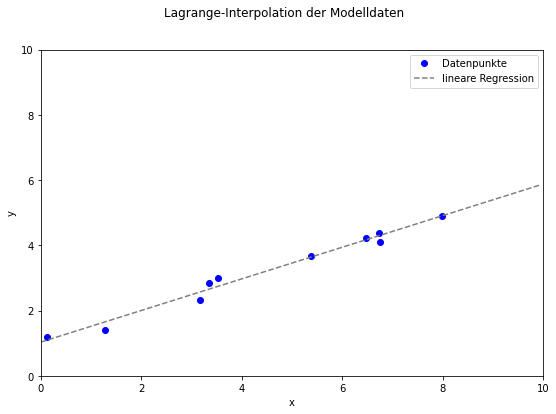

In [39]:
fig_l, ax_l = plt.subplots(figsize = (9, 6))
fig_l.suptitle("Lagrange-Interpolation der Modelldaten")

xx = np.arange(0, 10, 0.05)
yy = np.sum(lagrange_basis_polynomials(x, y, xx), axis = 0)
            
ax_l.set_xlabel("x")
ax_l.set_ylabel("y")
ax_l.set_xlim(0, 10)
ax_l.set_ylim(0, 10)
ax_l.plot(x, y, marker = "o", color = "blue", linestyle = "", label = "Datenpunkte")

ax_l.plot(xx, β0 + β1*xx, color = "gray", linestyle = "dashed", label = "lineare Regression")

if run > 0: 
    ax_l.plot(xx, yy, color = "gray", label = "Interpolationspolynom")
plt.legend()

run += 1

# Zusammenfassung

- Mit Regressionsverfahren bestimmt man **Parameter für ein Modell**, so dass vorgegebene Daten mit dem Modell optimal beschrieben werden.
- *Optimal* heißt in der Regel, dass die **Summe der Abstandsquadrate** minimal wird.
- Bei linearen Modellen kann man die optimalen Parameter auch direkt berechnen (**analytische Lösung**).
- Durch Betrachtung der **Residuen** kann man *Underfitting* erkennen.
- **Extrapolation**, also Berechnung von Schätzwerten außerhalb des durch die vorgegebenen Daten abgedeckten Bereichs, ist nicht erlaubt!